# Format of the data

When we create a model we must pre process our data in certain format. Keras `fit` function expects `x` and `y` data, `x` being the input or sample data and `y` being the output or target data for the given `x`.

* `x` can either be one of: 
    * numpy array
    * a tensor or a list of tensors
    * dictonary mapping input names to corresponding numpy array or tensors (useful in named inputs)
    * tf.data dataset
    * A generator/`keras.utils.Sequence` 
* `y` always has to be in the same format as `x`

# Data Prepration and Processing

Now we know what kind of data our model expects, we can prepare data to train our model. 

In [17]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Example Data - Hypothetical Covid-19 Trial

### Trial Details

* An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial of covid-19.
* The traisl has 3000 participants. Half were under 65 years old, half were 65 years or older.

### Findings 
* Around 85% of patients who were 65 or older experienced side effects.
* Around 85% of patients who were under 65 experienced no side effects.

In [107]:
# create sample data 

ages = []
labels = [] #1 -- had side effect 0 -- no side effect

random_younger_population = [randint(13,64) for x in range(1500)]
ages.extend(random_younger_population)
# 15% of 1500 yonger people experienced side effect 
labels.extend([1 for x in range(225)])
labels.extend([0 for x in range(1275)])


random_older_population = [randint(65, 100) for x in range(1500)]
ages.extend(random_older_population)
# 85% of 1500 older people experienced side effect 
labels.extend([1 for x in range(1275)])
labels.extend([0 for x in range(225)])

for i in range(len(ages)):
    print('' + str(i) + ' ' + str(ages[i]) + ' : ' + str(labels[i]))

ages = np.array(ages)
labels = np.array(labels)



0 55 : 1
1 35 : 1
2 41 : 1
3 47 : 1
4 26 : 1
5 53 : 1
6 41 : 1
7 42 : 1
8 64 : 1
9 59 : 1
10 62 : 1
11 60 : 1
12 52 : 1
13 58 : 1
14 37 : 1
15 34 : 1
16 41 : 1
17 24 : 1
18 44 : 1
19 56 : 1
20 36 : 1
21 40 : 1
22 24 : 1
23 24 : 1
24 63 : 1
25 56 : 1
26 39 : 1
27 36 : 1
28 37 : 1
29 14 : 1
30 59 : 1
31 38 : 1
32 39 : 1
33 48 : 1
34 23 : 1
35 46 : 1
36 44 : 1
37 47 : 1
38 40 : 1
39 31 : 1
40 17 : 1
41 44 : 1
42 40 : 1
43 35 : 1
44 33 : 1
45 29 : 1
46 36 : 1
47 15 : 1
48 30 : 1
49 48 : 1
50 55 : 1
51 42 : 1
52 39 : 1
53 47 : 1
54 59 : 1
55 29 : 1
56 59 : 1
57 52 : 1
58 57 : 1
59 44 : 1
60 18 : 1
61 53 : 1
62 37 : 1
63 21 : 1
64 37 : 1
65 45 : 1
66 28 : 1
67 52 : 1
68 17 : 1
69 60 : 1
70 52 : 1
71 33 : 1
72 56 : 1
73 64 : 1
74 55 : 1
75 16 : 1
76 28 : 1
77 16 : 1
78 60 : 1
79 19 : 1
80 27 : 1
81 14 : 1
82 40 : 1
83 14 : 1
84 44 : 1
85 29 : 1
86 46 : 1
87 42 : 1
88 40 : 1
89 60 : 1
90 45 : 1
91 58 : 1
92 60 : 1
93 46 : 1
94 36 : 1
95 57 : 1
96 42 : 1
97 26 : 1
98 23 : 1
99 32 : 1
100 15 : 1

2147 74 : 1
2148 92 : 1
2149 84 : 1
2150 73 : 1
2151 76 : 1
2152 83 : 1
2153 79 : 1
2154 73 : 1
2155 78 : 1
2156 71 : 1
2157 69 : 1
2158 79 : 1
2159 67 : 1
2160 69 : 1
2161 74 : 1
2162 88 : 1
2163 95 : 1
2164 97 : 1
2165 90 : 1
2166 79 : 1
2167 79 : 1
2168 92 : 1
2169 80 : 1
2170 90 : 1
2171 72 : 1
2172 70 : 1
2173 65 : 1
2174 98 : 1
2175 89 : 1
2176 93 : 1
2177 85 : 1
2178 83 : 1
2179 79 : 1
2180 72 : 1
2181 91 : 1
2182 96 : 1
2183 93 : 1
2184 69 : 1
2185 85 : 1
2186 69 : 1
2187 80 : 1
2188 99 : 1
2189 89 : 1
2190 82 : 1
2191 98 : 1
2192 78 : 1
2193 93 : 1
2194 76 : 1
2195 69 : 1
2196 73 : 1
2197 82 : 1
2198 81 : 1
2199 88 : 1
2200 71 : 1
2201 89 : 1
2202 72 : 1
2203 95 : 1
2204 100 : 1
2205 79 : 1
2206 66 : 1
2207 76 : 1
2208 97 : 1
2209 80 : 1
2210 73 : 1
2211 95 : 1
2212 96 : 1
2213 83 : 1
2214 86 : 1
2215 83 : 1
2216 99 : 1
2217 76 : 1
2218 65 : 1
2219 82 : 1
2220 83 : 1
2221 94 : 1
2222 87 : 1
2223 97 : 1
2224 73 : 1
2225 96 : 1
2226 67 : 1
2227 69 : 1
2228 89 : 1
2229 92 : 1
223

In [108]:
X_train, X_test, y_train, y_test = train_test_split(ages, labels, test_size=0.33)

In [109]:
# rescale data to be in between 0 to 1 instead of 13 to 65. This is to 
# simplify the data so we can optimize the model and run it faster
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X_train = scaler.fit_transform(X_train.reshape(-1, 1))

# Building a model 

In [110]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dense

In [111]:
# check to see if gups are avialable 
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num of GPUs available: ', len(physical_devices))
if len(physical_devices) > 0: 
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num of GPUs available:  0


In [112]:
model = Sequential()

# 1st hidden layer
model.add(Dense(16, input_shape=(1,), activation='relu'))
# 2nd hidden layer
model.add(Dense(units=32, activation='relu'))
# output layer
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_19 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Training Model

In [124]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [125]:
model.compile(optimizer=Adam(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [126]:
model.fit(x=scaled_X_train, y=y_train, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Train on 1809 samples, validate on 201 samples
Epoch 1/30
1809/1809 - 1s - loss: 0.4364 - accuracy: 0.8441 - val_loss: 0.5365 - val_accuracy: 0.8010
Epoch 2/30
1809/1809 - 0s - loss: 0.4345 - accuracy: 0.8430 - val_loss: 0.5031 - val_accuracy: 0.8010
Epoch 3/30
1809/1809 - 0s - loss: 0.4358 - accuracy: 0.8447 - val_loss: 0.5565 - val_accuracy: 0.7910
Epoch 4/30
1809/1809 - 0s - loss: 0.4377 - accuracy: 0.8452 - val_loss: 0.5423 - val_accuracy: 0.7910
Epoch 5/30
1809/1809 - 0s - loss: 0.4496 - accuracy: 0.8436 - val_loss: 0.5389 - val_accuracy: 0.8010
Epoch 6/30
1809/1809 - 0s - loss: 0.4423 - accuracy: 0.8391 - val_loss: 0.5237 - val_accuracy: 0.8010
Epoch 7/30
1809/1809 - 0s - loss: 0.4313 - accuracy: 0.8480 - val_loss: 0.5388 - val_accuracy: 0.7761
Epoch 8/30
1809/1809 - 0s - loss: 0.4424 - accuracy: 0.8425 - val_loss: 0.5253 - val_accuracy: 0.7861
Epoch 9/30
1809/1809 - 0s - loss: 0.4396 - accuracy: 0.8452 - val_loss: 0.5220 - val_accuracy: 0.7910
Epoch 10/30
1809/1809 - 0s - loss: 

# Creating Validation Data Set

We can create validation data set using two methods. We can create a data set that contains (x, y) just as we created train data set and pass that to fit function using `validation_data` parameter. Or, we can simply pass `validation_split` parameter to the `fit` function as we did earlier. When we use `validation_split` it is important to remember that the shuffle of data within the `fit` function occurs after the split, so we need to make sure that the data we pass to `fit` is already shuffled.

In [116]:
predictions = model.predict(X_test, batch_size=10)

In [117]:
rounded_predictions = np.argmax(predictions, axis=-1)

# Visualizing prediction on test data

In [118]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import itertools
import matplotlib.pyplot as plt 

In [119]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

In [120]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  0 490]
 [  0 500]]


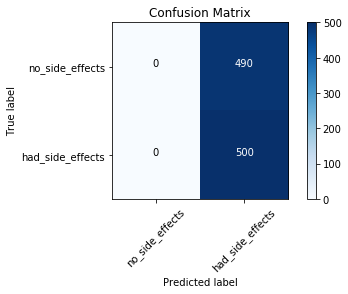

In [121]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')